
<img align="left" style="padding-right:100px;" src="http://pvexpect.com/Driftsledelse/Dagligvarer/nmbu.png">

  **Digital Driftsledelse - IND310**

 Jesper Ørntoft Frausig, 2021


#7.0 Kart

- [Vis Kart](#7.1)
- [Vis Kart med regioner](#7.2)

## **7.1 Vis kart**

In [ ]:

import altair as alt

import pandas as pd

countries = alt.topo_feature('https://dmws.hkvservices.nl/dataportal/data.asmx/read?database=vega&key=europe', 'europe') 

#opret baggrund, baseret på lande
background =alt .  Chart ( countries ) .  mark_geoshape (stroke= "white",fill="lightgrey") .  encode ( #fill="lightgray",
)

background





alt.Chart(...)

In [ ]:
import pandas as pd

fiskeri=pd.read_csv("https://www.fiskeridir.no/Akvakultur/Tall-og-analyse/Biomassestatistikk/Biomassestatistikk-etter-fylke/_/attachment/download/422fa084-c905-43b4-9446-a050e92e80e5:1c81cbe34307c35cb79e7dc5a55aae783ab17ac7/biostat-total-flk-2019.csv", delimiter=";", error_bad_lines=False, encoding='latin-1')
fiskeri

,ÅR,MÅNED_KODE,MÅNED,FYLKE,ARTSID,UTSETTSÅR,BEHFISK_STK,BIOMASSE_KG,UTSETT_SMOLT_STK,FORFORBRUK_KG,UTTAK_STK,UTTAK_KG,DØDFISK_STK,UTKAST_STK,RØMMING_STK,ANDRE_STK
0,2005,1,JANUAR,01 Finnmark,LAKS,2002,95347,"545829,398",0,29290,0,0,911,0,0,0
1,2005,1,JANUAR,01 Finnmark,LAKS,2003,2238516,"10186245,25",0,625198,705419,3352492,28167,0,0,0
2,2005,1,JANUAR,01 Finnmark,REGNBUEØRRET,2003,53523,"129632,706",0,12627,0,0,45,0,0,0
3,2005,1,JANUAR,01 Finnmark,LAKS,2004,6872490,"9591619,88",0,961333,0,0,35681,34,0,0
4,2005,1,JANUAR,01 Finnmark,REGNBUEØRRET,2004,284070,"352301,491",0,40811,0,0,445,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,2019,12,DESEMBER,09 Rogaland og øvrige,LAKS,2017,3505,"28365,965",0,0,0,0,113,0,0,-374
7778,2019,12,DESEMBER,09 Rogaland og øvrige,LAKS,2018,7855160,"30989960,77",0,4825979,2777679,"13067977,5",115404,95212,0,16542
7779,2019,12,DESEMBER,09 Rogaland og øvrige,REGNBUEØRRET,2018,230205,"918701,109",0,57137,80889,"279883,055",7426,1585,0,-2245
7780,2019,12,DESEMBER,09 Rogaland og øvrige,LAKS,2019,26906416,"29951927,48",252749,6860835,0,0,233774,0,0,71


In [ ]:
fylkedata=pd.read_csv("https://raw.githubusercontent.com/jfrausig/test/master/fylker_kommuner_region_16.csv")

In [ ]:
fylke_koder=pd.read_csv("http://pvexpect.com/IND310_teknologi/fylke_kode_2020.txt")
fylke_koder

,Fylkesnavn_2020_KODE,FYLKE_KODE
0,TROMS OG FINNMARK,01 Finnmark
1,TROMS OG FINNMARK,02 Troms
2,NORDLAND,03 Nordland
3,TRØNDELAG,04 Trøndelag
4,MØRE OG ROMSDAL,06 Møre og Romsdal
5,VESTLAND,07 Sogn og Fjordane
6,VESTLAND,08 Hordaland
7,ROGALAND,09 Rogaland og øvrige
8,NaN,UOPPGITT


In [ ]:
for column in fylkedata.columns:
  fylkedata.rename(inplace=True, columns={column: column.replace(".","").replace(" ","_")})
fylkedata

,Fylkesnavn_2019,Kommunenr_2019,Kommunenavn_2019,Fylkesnr_2020,Fylkesnavn_2020,Kommunenr_2020,Kommunenavn_2020,DVH_regioner_2019,SIFO_regioner_2019,kommune,kommunenummer
0,ØSTFOLD,101,HALDEN,30,VIKEN,3001,HALDEN,Østre Østland DVH,Østre Østland,halden,3001
1,ØSTFOLD,104,MOSS,30,VIKEN,3002,MOSS,Østre Østland DVH,Østre Østland,moss,3002
2,ØSTFOLD,105,SARPSBORG,30,VIKEN,3003,SARPSBORG,Østre Østland DVH,Østre Østland,sarpsborg,3003
3,ØSTFOLD,106,FREDRIKSTAD,30,VIKEN,3004,FREDRIKSTAD,Østre Østland DVH,Østre Østland,fredrikstad,3004
4,ØSTFOLD,111,HVALER,30,VIKEN,3011,HVALER,Østre Østland DVH,Østre Østland,hvaler,3011
...,...,...,...,...,...,...,...,...,...,...,...
420,TRØNDELAG,5051,NÆRØY,50,TRØNDELAG,5060,NÆRØYSUND,Midt Norge DVH,Midt-Norge,nærøysund,5060
421,TRØNDELAG,5052,LEKA,50,TRØNDELAG,5052,LEKA,Midt Norge DVH,Midt-Norge,leka,5052
422,TRØNDELAG,5053,INDERØY,50,TRØNDELAG,5053,INDERØY,Midt Norge DVH,Midt-Norge,inderøy,5053
423,TRØNDELAG,5054,INDRE FOSEN,50,TRØNDELAG,5054,INDRE FOSEN,Midt Norge DVH,Midt-Norge,indre fosen,5054


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 42.2 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [ ]:
import altair as alt
import pandas as pd
import geopandas as gpd
import json



Tryk på nedstående link, for at download filen kommuner_komprimeret.json:

https://github.com/smistad/konverter-norgeskart-projeksjon/releases/download/v2020/kommuner_komprimert.json







Last deretter opp filen "kommuner_komprimeret.json"


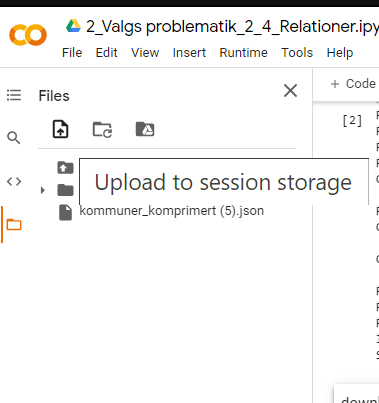

In [ ]:
geo_json_file_loc= "kommuner_komprimert.json"
with open(geo_json_file_loc) as json_data:
    data = json.load(json_data)
gdf = gpd.GeoDataFrame.from_features(data, crs = "str")


FileNotFoundError: ignored

In [ ]:
gdf.head(5)

NameError: ignored

In [ ]:
selection_area = alt.selection_multi( name='sel', fields=['Kommunenavn_2020'],  empty='none') #on='mouseover', #, empty='none'

norway =alt .  Chart ( gdf ) .  mark_geoshape (stroke= "black").transform_lookup(
    lookup='kommunenummer',
    from_=alt.LookupData(fylkedata, 'Kommunenr_2020', list(fylkedata.columns)) #list(fylkedata.drop(['Type matvare','fylkesnummer'],axis=1).columns)
).transform_lookup(
    lookup='Fylkesnavn_2020',
    from_=alt.LookupData(fylke_koder, 'Fylkesnavn_2020_KODE', list(fylke_koder.columns)) #list(fylkedata.drop(['Type matvare','fylkesnummer'],axis=1).columns)
).transform_lookup(
    lookup='FYLKE_KODE',
    from_=alt.LookupData(fiskeri, 'FYLKE', list(fiskeri.columns)) #list(fylkedata.drop(['Type matvare','fylkesnummer'],axis=1).columns)
).transform_fold(
    ['BEHFISK_STK', 'BIOMASSE_KG', 'UTSETT_SMOLT_STK', 'FORFORBRUK_KG', 'UTTAK_STK', 'UTTAK_KG', 'DØDFISK_STK', 'UTKAST_STK', 'RØMMING_STK', 'ANDRE_STK']   
).encode(
  #color='Fylkesnavn_2020:N',
  color='FORFORBRUK_KG:Q',
  tooltip=['Fylkesnr_2019:N','Fylkesnavn_2019:N','Kommunenr_2019:N','Kommunenavn_2019:N','Fylkesnr_2020:N','Fylkesnavn_2020:N','Kommunenr_2020:N','Kommunenavn_2020:N','FORFORBRUK_KG:Q']

).project( #projektere visning background+
    type= 'mercator', #vælg projektering
    scale= 1300, #skalere visning
    center= [12,65],  #centere visning på følgende gps koordinate
) .  properties (
     width = 800 ,
     height = 800
)

norway 

  #.save("relationer.html")

In [ ]:
#selection_area = alt.selection_multi( name='sel', fields=['Fylkesnavn_2020','Kommunenavn_2020'],  empty='none') 
selection_area = alt.selection_multi( name='sel', fields=['FYLKE'],  empty='none') 



norway =alt .  Chart ( gdf ) .  mark_geoshape (stroke= "black").transform_lookup(
    lookup='kommunenummer',
    from_=alt.LookupData(fylkedata, 'Kommunenr_2020', list(fylkedata.columns)) #list(fylkedata.drop(['Type matvare','fylkesnummer'],axis=1).columns)
).transform_lookup(
    lookup='Fylkesnavn_2020',
    from_=alt.LookupData(fylke_koder, 'Fylkesnavn_2020_KODE', list(fylke_koder.columns)) #list(fylkedata.drop(['Type matvare','fylkesnummer'],axis=1).columns)
).transform_lookup(
    lookup='FYLKE_KODE',
    from_=alt.LookupData(fiskeri, 'FYLKE', list(fiskeri.columns)) #list(fylkedata.drop(['Type matvare','fylkesnummer'],axis=1).columns)
).encode(
  #color='Fylkesnavn_2020:N',
  opacity=alt.condition(selection_area, alt.value(1), alt.value(0.3)),
  color='FORFORBRUK_KG:Q',
  
  tooltip=['Fylkesnr_2019:N','Fylkesnavn_2019:N','Kommunenr_2019:N','Kommunenavn_2019:N','Fylkesnr_2020:N','Fylkesnavn_2020:N','Kommunenr_2020:N','Kommunenavn_2020:N','FORFORBRUK_KG:Q']
).project( #projektere visning background+
    type= 'mercator', #vælg projektering
    scale= 600, #skalere visning
    center= [0,70],  #centere visning på følgende gps koordinate
).  properties (
     width = 300 ,
     height = 300
)

poster=alt.Chart(fiskeri).mark_bar().transform_fold(
    ['BEHFISK_STK', 'BIOMASSE_KG', 'UTSETT_SMOLT_STK', 'FORFORBRUK_KG', 'UTTAK_STK', 'UTTAK_KG', 'DØDFISK_STK', 'UTKAST_STK', 'RØMMING_STK', 'ANDRE_STK']   
).encode(
    #text='total:N'
    x='key:N',  #FYLKE
    y='value:Q',
    color='ÅR:N',
    #opacity=alt.condition(selection_area, alt.value(1), alt.value(0.0))
    #tooltip=['Produkter:N','Salg_i_verdi_1000_NOK_2019:Q'],

    #text='DVH_regioner_2019_sel:N'

).  properties (
     width = 300 ,
     height = 300
) 



grønt_chart=alt.Chart(fiskeri).mark_bar().encode(
    #text='total:N'
    x='ÅR:N',  #FYLKE
    y='FORFORBRUK_KG:Q',
    #color='FYLKE:Q',
    #opacity=alt.condition(selection_area, alt.value(1), alt.value(0.0))
    #tooltip=['Produkter:N','Salg_i_verdi_1000_NOK_2019:Q'],

    #text='DVH_regioner_2019_sel:N'

).  properties (
     width = 300 ,
     height = 300
).transform_filter(selection_area)
#).transform_fold(
#    ['BEHFISK_STK', 'BIOMASSE_KG', 'UTSETT_SMOLT_STK', 'FORFORBRUK_KG', 'UTTAK_STK', 'UTTAK_KG', 'DØDFISK_STK', 'UTKAST_STK', 'RØMMING_STK', 'ANDRE_STK']   


alt.vconcat(norway,grønt_chart, poster ).add_selection( selection_area).properties(padding=50)

NameError: ignored